# Regression in Scikit-learn

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# other
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
# import dataset

df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df_linear_model = df[["age", "fare"]]

In [ ]:
# Simple linear regression

x = df[["age"]]
y = df[["fare"]]

In [14]:
x.isnull().sum()

age    0
dtype: int64

In [ ]:
df_linear_model.age.fillna(value=df_linear_model["age"].mean(), inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_12640\1658970456.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_linear_model.age.fillna(value = df_linear_model['age'].mean(), inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_12640\1658970456.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_linear_model.age.fillna(value = df_lin

In [15]:
y.isnull().sum()

fare    0
dtype: int64

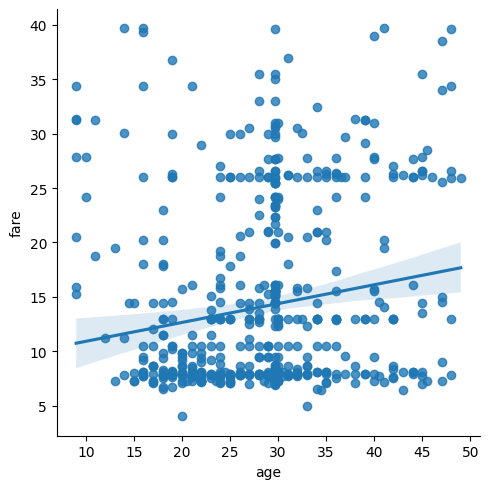

In [ ]:
# plot

sns.lmplot(data=df_linear_model, y="fare", x="age")

<Axes: ylabel='age'>

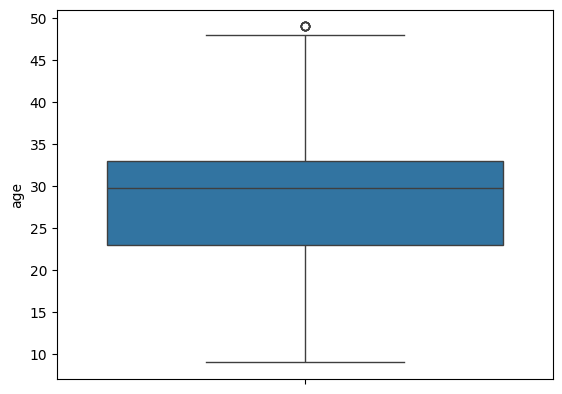

In [ ]:
# Removing outliers from the dataset

sns.boxplot(data=df_linear_model, y="age")

In [ ]:
df_linear_model = df_linear_model[
    (df_linear_model["age"] > 8) & (df_linear_model["age"] < 50)
]

<Axes: ylabel='fare'>

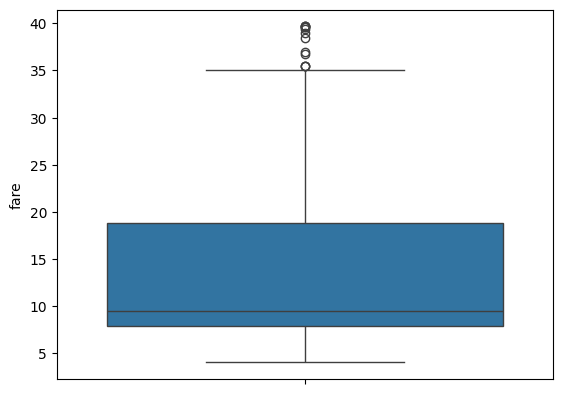

In [ ]:
sns.boxplot(data=df_linear_model, y="fare")

In [ ]:
df_linear_model = df_linear_model[
    (df_linear_model["fare"] > 1) & (df_linear_model["fare"] < 40)
]

In [ ]:
# Regression

x = df_linear_model[["age"]]
y = df_linear_model[["fare"]]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# model building
model = LinearRegression()

# train model
model.fit(x, y)

# predicting model

model.predict([[25]])

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[13.51193182]])

In [ ]:
# model evaluation with metrics
# r2
# mean_squared_error
# mean_absolute_error
# RMSE

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


# model
model = LinearRegression()

# train
model.fit(x_train, y_train)

# predict
pred = model.predict(x_test)

<Axes: >

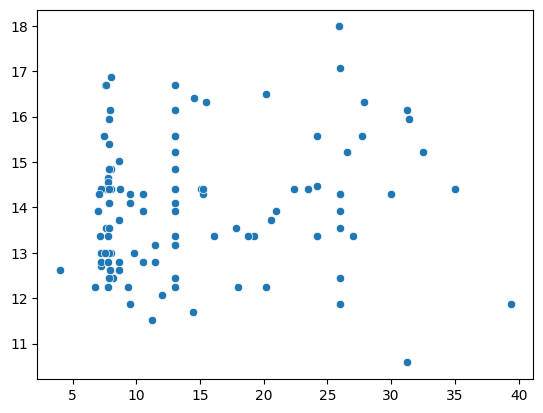

In [ ]:
# flatten is for converting a multi-dimensional array into a one-dimensional array

sns.scatterplot(x=y_test.values.flatten(), y=pred.flatten())

In [ ]:
# model score is model.evaluate(x_test, y_test) what it do is show the performance of the model on the test data.
# The higher the value the better the model is at making predictions and the lower the value the worse the model is at making predictions.
# In this case, the score method returns the mean accuracy of the model on the given test data. It ranges between 0 and 1, where 1 is the best possible accuracy.
model.score(x_test, y_test)

0.004957403533020988

In [ ]:
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    root_mean_squared_error,
)

MAE = mean_absolute_error(y_true=y_test, y_pred=pred)
MSE = mean_squared_error(y_true=y_test, y_pred=pred)
R2 = r2_score(y_true=y_test, y_pred=pred)
RMSE = root_mean_squared_error(y_true=y_test, y_pred=pred)

print("MAE:", MAE)
print("MSE:", MSE)
print("R2:", R2)
print("RMSE:", RMSE)

MAE: 6.3844932304261715
MSE: 61.06923420832227
R2: 0.004957403533020988
RMSE: 7.814680684987857


# Multiple Linear Regression

In [ ]:
iris = sns.load_dataset("iris")

In [59]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
iris_multi = iris[["sepal_length", "sepal_width", "petal_length", "petal_width"]]

In [ ]:
a = iris[["sepal_length", "sepal_width", "petal_length"]]
b = iris[["petal_width"]]

In [63]:
a.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
dtype: int64

In [64]:
b.isnull().sum()

petal_width    0
dtype: int64

<Axes: ylabel='sepal_length'>

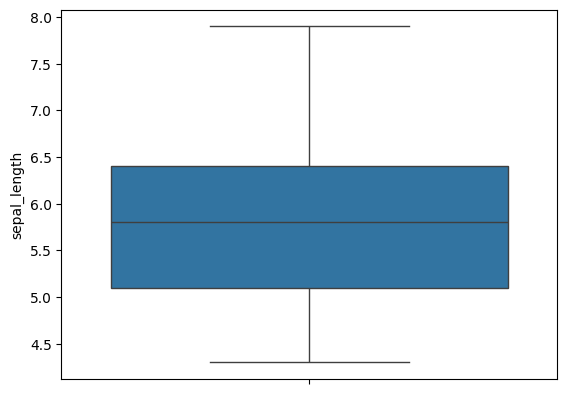

In [ ]:
sns.boxplot(data=iris_multi, y="sepal_length")

<Axes: ylabel='sepal_width'>

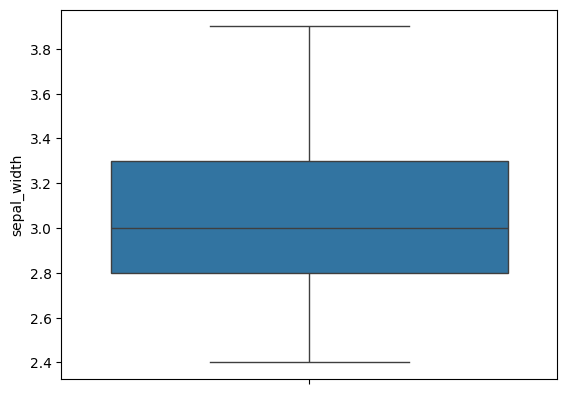

In [ ]:
sns.boxplot(data=iris_multi, y="sepal_width")

In [ ]:
iris_multi = iris_multi[
    (iris_multi["sepal_width"] > 2.3) & (iris_multi["sepal_width"] < 4.0)
]

<Axes: ylabel='petal_length'>

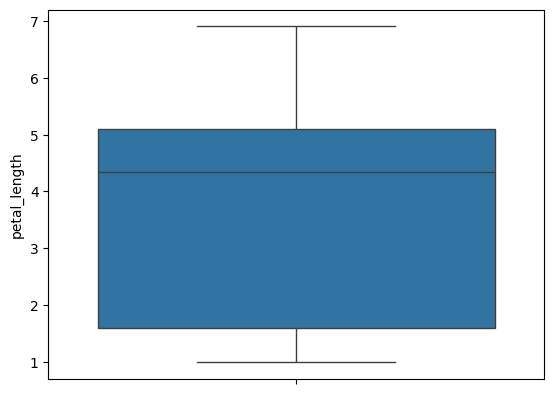

In [ ]:
sns.boxplot(data=iris_multi, y="petal_length")

<Axes: ylabel='petal_width'>

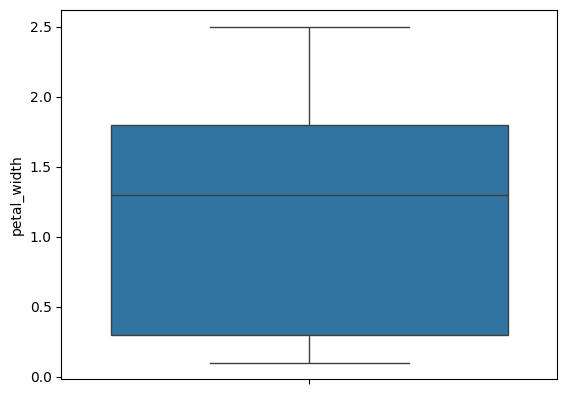

In [ ]:
sns.boxplot(data=iris_multi, y="petal_width")

In [ ]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D

# Define independent variables (X) and dependent variable (y)
a = iris[["sepal_length", "sepal_width", "petal_length"]]
b = iris["petal_width"]

# Fit the multiple linear regression model
model = LinearRegression()
model.fit(a, b)

# Predict values
y_pred = model.predict([[5.1, 3.5, 1.4]])
print("Predicted petal_width:", y_pred)

Predicted petal_width: [0.2162519]


C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


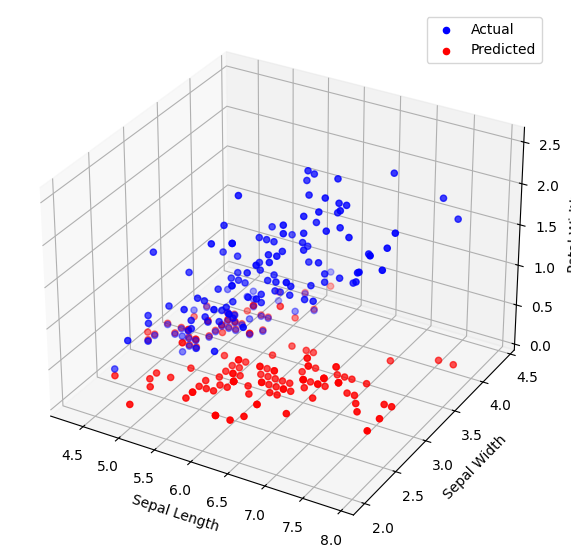

In [ ]:
# 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")

# Scatter actual values
ax.scatter(a["sepal_length"], a["sepal_width"], b, color="blue", label="Actual")

# Scatter predicted values
ax.scatter(a["sepal_length"], a["sepal_width"], y_pred, color="red", label="Predicted")

# Labels and legend
ax.set_xlabel("Sepal Length")
ax.set_ylabel("Sepal Width")
ax.set_zlabel("Petal Width")
ax.legend()

plt.show()

In [85]:
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.2)


# model
model = LinearRegression()

# train
model.fit(a_train, b_train)

# predict
pred1 = model.predict(a_test)

In [ ]:
model.score(a_test, b_test)

# the indicated results suggests that the model is almost perfect.

0.9727312149040804

In [93]:
#### A value of **0.9727** for **Rsqr (Coefficient of Determination)** is excellent. 
#### It indicates that the model explains **97.27% of the variance** in the dependent variable (e.g., `petal_width` or `fare`) based on the independent variables. 
#### This suggests that the model is performing very well.

In [87]:
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    root_mean_squared_error,
)

MAE = mean_absolute_error(y_true=b_test, y_pred=pred1)
MSE = mean_squared_error(y_true=b_test, y_pred=pred1)
R2 = r2_score(y_true=b_test, y_pred=pred1)
RMSE = root_mean_squared_error(y_true=b_test, y_pred=pred1)

print("MAE:", MAE)
print("MSE:", MSE)
print("R2:", R2)
print("RMSE:", RMSE)

MAE: 0.10122256677626865
MSE: 0.015041461858909234
R2: 0.9727312149040804
RMSE: 0.12264363766176065


In [ ]:
These values indicate a good model performance:

- **MAE (Mean Absolute Error)**: 0.1012 is low, meaning the average absolute difference between predicted and actual values is small.
- **MSE (Mean Squared Error)**: 0.0150 is also low, indicating small squared differences between predicted and actual values.
- **R² (Coefficient of Determination)**: 0.9727 is very close to 1, showing that the model explains 97.27% of the variance in the data.
- **RMSE (Root Mean Squared Error)**: 0.1226 is low, further confirming good predictive accuracy.

Overall, these metrics suggest that the model is performing well.